# Simple network creation

This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the ```Snudda/snudda/examples/notebooks``` directory, as all paths are given relative to there.

First we create a ```network-config.json``` file in ```networks/simple_example``` which is a subdirectory to the ```notebooks``` directory that will be automatically created at runtime. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the ```Snudda/snudda/data/neurons/dspn``` and ```ispn``` folders.

Here we have set the ```random_seed``` to ```12345```.

In [10]:
import os
from snudda import SnuddaInit

network_path = os.path.join("networks","simple_example")
snudda_data = os.path.join("..", "..", "snudda", "data")  # "/home/hjorth/HBP/BasalGangliaData/data/" 
si = SnuddaInit(network_path=network_path, random_seed=12345, snudda_data=snudda_data)
si.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0, neuron_density=80500,
                    volume_type="cube", neurons_dir="$DATA/neurons")
si.write_json()

Using cube for striatum
Neurons for striatum read from c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\snudda\data\neurons/striatum
FS: Skipping neuron because, num_neurons =0
Adding neurons: dSPN from dir c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\snudda\data\neurons\striatum\dspn
Adding neurons: iSPN from dir c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\snudda\data\neurons\striatum\ispn
ChIN: Skipping neuron because, num_neurons =0
LTS: Skipping neuron because, num_neurons =0
No directory $DATA/neurons\striatum\ngf, skipping NGF cells.
Writing networks\simple_example\network-config.json


In [11]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

# This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.
# Touch detection to locate putative synapses
# Prune the synapses in the network based on the connection information in the network-config.json file.

Placing neurons
Network path: networks\simple_example
Reading SNUDDA_DATA=c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\snudda\data from networks\simple_example\network-config.json
No n_putative_points and putative_density, setting n_putative_points = 1359
(this must be larger than the number of neurons you want to place)
Generating 1359 points for networks\simple_example\mesh\Striatum-cube-mesh-0.00013543930142996346.obj
Filtering, keeping inside points: 282 / 554
neuron_name = 'dSPN_0', num = 25, neuron_path = '$SNUDDA_DATA\\neurons\\striatum\\dspn\\str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508'
neuron_name = 'dSPN_1', num = 25, neuron_path = '$SNUDDA_DATA\\neurons\\striatum\\dspn\\str-dspn-e150917_c10_D1-mWT-P270-20-v20190521'
neuron_name = 'dSPN_2', num = 25, neuron_path = '$SNUDDA_DATA\\neurons\\striatum\\dspn\\str-dspn-e150917_c6_D1-m21-6-DE-v20190503'
neuron_name = 'dSPN_3', num = 25, neuron_path = '$SNUDDA_DATA\\neurons\\striatum\\dspn\\str-dspn-e

Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Reading SNUDDA_DATA=c:\Users\geige\OneDrive - TUM\Dokumente\5 TUM\25SS\Masterthesis\Code\Snudda\snudda\data from networks\simple_example\network-config.json


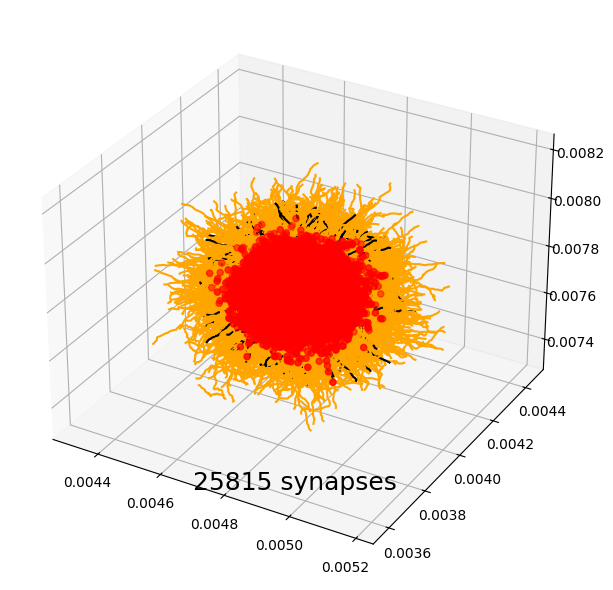

In [12]:
from snudda.plotting import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)